#Problem Statement:
"""Investment is a game of understanding historic data of investment objects under
different events but it is still a game of chances to minimize the risk we apply analytics
to find the equilibrium investment.
To understand the Foreign direct investment in India for the last 17 years from 2000-01
to 2016-17. This dataset contains sector and financial year-wise data of FDI in India
Sector-wise investment analysis
Year-wise investment analysis
Find key metrics and factors and show the meaningful relationships between attributes.
Do your own research and come up with your findings
Dataset FDI_India.csv"""


*****results- The FDI varies considerably across sectors, with a standard deviation of 55.08. The median FDI is 71.70 crore, while the average is slightly higher at 67.40 crore. The minimum FDI is in the "COIR" sector (4.06 crore), and the maximum is in the "TIMBER PRODUCTS" sector (157.68 crore).*******

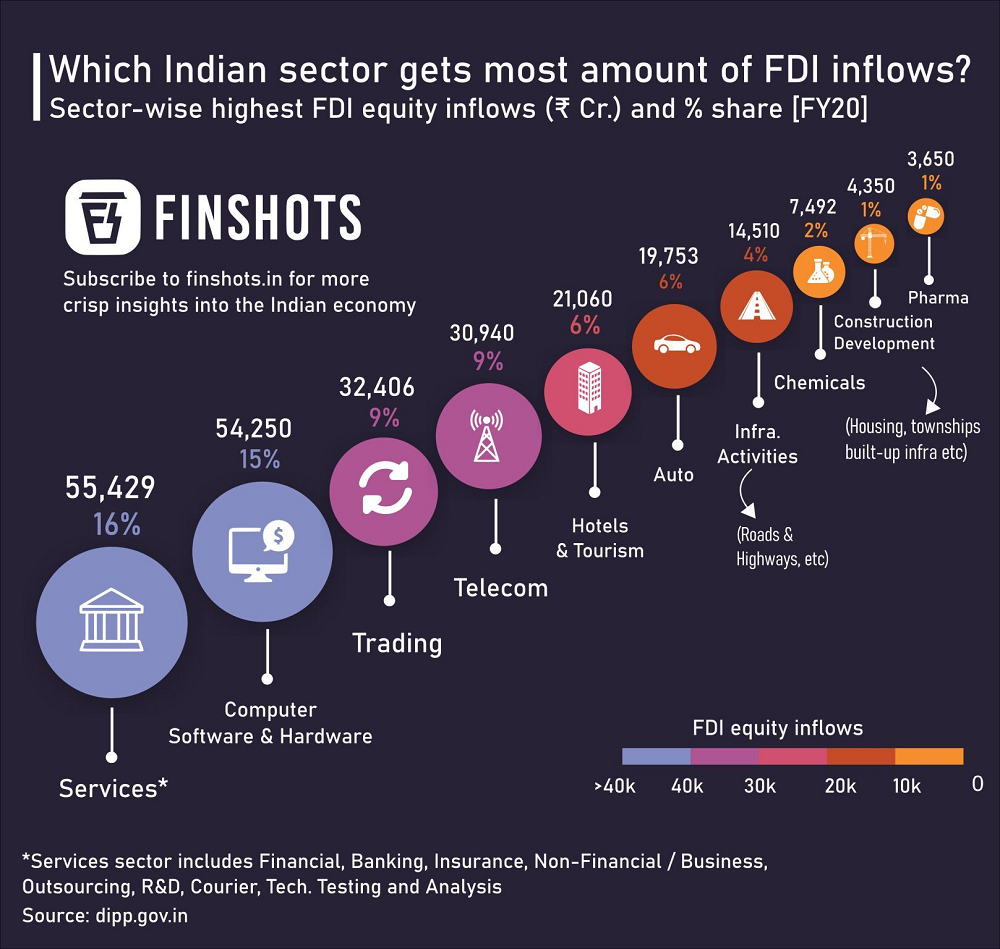

In [154]:
#using 3rd party image link
image_url = "https://d3jlwjv6gmyigl.cloudfront.net/images/2021/03/Sector-wise-FDI.png"
response = requests.get(image_url, stream=True)

if response.status_code == 200:
    # Check for successful response
    image_bytes = response.content
    from IPython.display import display, Image

    display(Image(data=image_bytes))
else:
    print(f"Failed to download image. Status code: {response.status_code}")


In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
!pip install requests
import requests

In [10]:
fdi = pd.read_csv('FDI_India.csv')

In [14]:
fdi.tail(10)

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
53,TRADING,11.49,43.27,38.13,31.12,14.22,28.93,114.65,345.02,643.64,737.95,498.04,731.55,717.80,1343.39,2727.96,3845.32,2338.40
54,RETAIL TRADING,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.27,0.09,13.73,26.27,31.70,22.31,11.30,168.72,262.24,450.94
55,AGRICULTURE SERVICES,17.52,14.06,11.01,0.59,3.83,9.08,12.53,58.13,5.35,1222.22,43.90,49.02,161.47,91.01,59.95,84.65,76.43
56,"DIAMOND,GOLD ORNAMENTS",18.83,0.36,1.30,1.96,8.58,15.52,61.97,59.15,83.50,31.08,19.59,36.30,52.61,42.56,280.18,58.54,123.92
57,TEA AND COFFEE (PROCESSING & WAREHOUSING COFFE...,20.23,0.14,0.00,0.32,0.01,1.43,6.20,18.94,37.08,8.15,3.12,5.32,0.27,5.86,1.43,1.12,1.60
58,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,0.00,0.00,6.30,0.00,0.06,9.90,20.04,35.54,31.61,70.51,36.63,47.39,14.34,113.78,72.58,122.81,53.17
59,COIR,0.00,0.00,0.00,0.00,0.47,0.59,0.04,0.01,0.00,0.25,0.10,0.55,0.15,0.54,1.36,0.00,0.00
60,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,0.00,0.00,0.00,0.00,0.00,0.93,64.06,182.92,172.70,324.56,675.07,386.28,283.89,485.37,870.25,4510.71,1860.73
61,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",24.33,51.75,36.10,47.04,152.06,228.71,1392.95,3887.33,4657.51,5466.13,1663.03,3140.78,1332.49,1226.05,769.14,112.55,105.14
62,MISCELLANEOUS INDUSTRIES,832.07,221.37,218.76,235.48,121.83,164.76,304.87,528.42,1549.70,1147.56,1475.97,813.38,229.49,468.74,765.88,668.77,296.40


In [12]:
#Pandas DataFrame method used to display the initial rows of the DataFrame.
fdi.head(10)


,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
4,COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00
5,PETROLEUM & NATURAL GAS,9.35,211.07,56.78,80.64,102.78,12.09,87.71,1405.04,349.29,265.53,556.43,2029.98,214.80,112.23,1079.02,103.02,180.40
6,BOILERS AND STEAM GENERATING PLANTS,0.00,0.00,0.00,0.04,0.54,0.00,3.31,1.51,0.00,3.96,0.63,31.79,20.05,0.17,1.33,77.91,53.91
7,PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS),0.00,0.00,0.00,0.00,2.66,0.74,25.57,40.53,74.88,39.50,166.44,313.75,184.60,212.78,230.70,159.13,286.88
8,ELECTRICAL EQUIPMENTS,79.76,65.76,34.71,73.20,97.40,39.50,76.85,653.74,417.35,728.27,153.90,566.39,195.87,134.31,574.83,444.88,2230.69
9,COMPUTER SOFTWARE & HARDWARE,228.39,419.39,314.24,368.32,527.90,1359.97,2613.33,1382.25,1543.34,871.86,779.81,796.35,485.96,1126.27,2296.04,5904.36,3651.71


In [16]:
#len() is the function used to determine the length of an object.
len(fdi)

63

In [18]:
#returns a tuple representing the dimensions of the Pandas DataFrame fdi.
fdi.shape

(63, 18)

In [20]:
print("Number of Rows:", fdi.shape[0] , "\n" "Number of Columns:", fdi.shape[1])

Number of Rows: 63 
Number of Columns: 18


In [132]:
#Checking the information of the dataset
fdi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, METALLURGICAL INDUSTRIES to MISCELLANEOUS INDUSTRIES
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   2000-01  63 non-null     float64
 1   2001-02  63 non-null     float64
 2   2002-03  63 non-null     float64
 3   2003-04  63 non-null     float64
 4   2004-05  63 non-null     float64
 5   2005-06  63 non-null     float64
 6   2006-07  63 non-null     float64
 7   2007-08  63 non-null     float64
 8   2008-09  63 non-null     float64
 9   2009-10  63 non-null     float64
 10  2010-11  63 non-null     float64
 11  2011-12  63 non-null     float64
 12  2012-13  63 non-null     float64
 13  2013-14  63 non-null     float64
 14  2014-15  63 non-null     float64
 15  2015-16  63 non-null     float64
 16  2016-17  63 non-null     float64
dtypes: float64(17)
memory usage: 10.9+ KB


In [24]:
fdi.isnull().sum() #:Calculates the count of missing values in each column of the DataFrame.

Sector     0
2000-01    0
2001-02    0
2002-03    0
2003-04    0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
2012-13    0
2013-14    0
2014-15    0
2015-16    0
2016-17    0
dtype: int64

In [26]:
fdi.describe() #provides descriptive statistics of numerical columns in a DataFrame. 

,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,37.757302,63.931587,42.925714,34.727778,51.090317,87.932540,198.281905,390.085714,498.348571,410.069524,339.413810,557.472698,355.930000,385.703492,490.959841,634.936349,690.131111
std,112.227860,157.878737,86.606439,67.653735,101.934873,206.436967,686.783115,1026.249935,1134.649040,926.814626,627.141139,1031.474056,778.091368,658.429944,837.787060,1335.307706,1411.965354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.200000,0.215000,0.715000,1.230000,4.160000,9.950000,11.950000,7.880000,8.430000,22.720000,15.115000,16.610000,33.800000,30.000000,19.905000
50%,4.030000,5.070000,11.010000,6.370000,9.090000,22.620000,25.820000,58.820000,84.880000,69.740000,58.070000,129.360000,95.410000,113.780000,177.220000,159.130000,110.860000
75%,23.510000,44.830000,36.555000,38.660000,43.205000,63.855000,108.325000,279.270000,383.320000,341.595000,304.280000,593.525000,288.025000,473.060000,595.390000,519.070000,741.220000
max,832.070000,873.230000,419.960000,368.320000,527.900000,1359.970000,4713.780000,6986.170000,6183.490000,5466.130000,3296.090000,5215.980000,4832.980000,3982.890000,4443.260000,6889.460000,8684.070000


In [28]:
fdi.duplicated().sum()

0

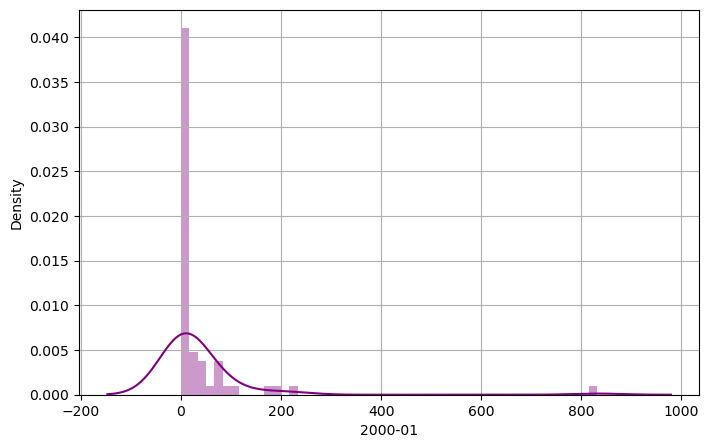

In [30]:
plt.figure(figsize=(8,5))
sns.distplot(fdi['2000-01'] , color = 'Purple')
plt.grid()
plt.show()                   #visualization of the distribution of a specific column in your DataFrame 

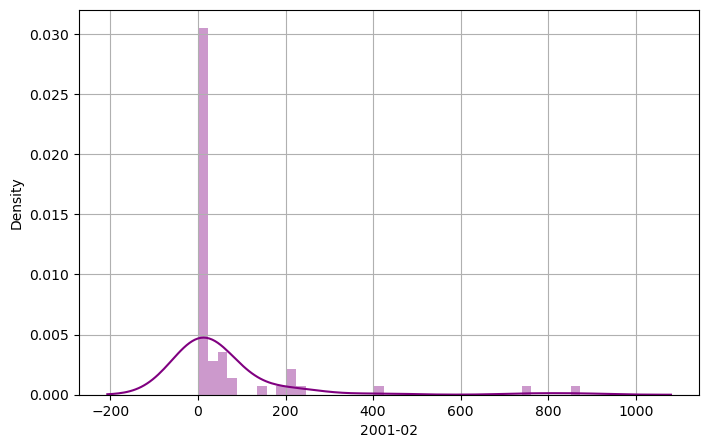

In [32]:
plt.figure(figsize=(8,5))
sns.distplot(fdi['2001-02'] , color = 'Purple')
plt.grid()
plt.show()

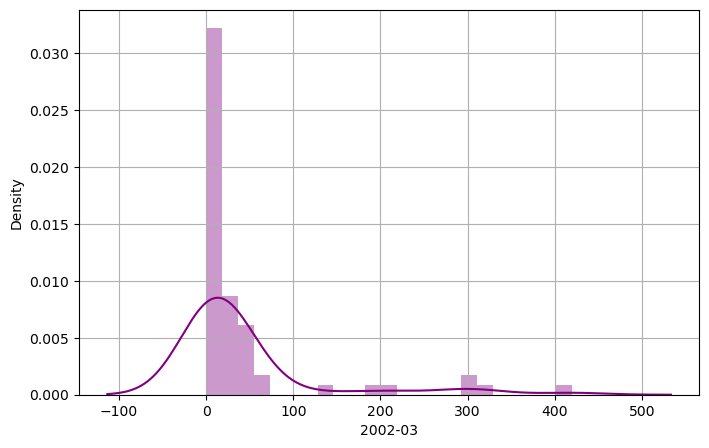

In [34]:
plt.figure(figsize=(8,5))
sns.distplot(fdi['2002-03'] , color = 'Purple')
plt.grid()
plt.show()

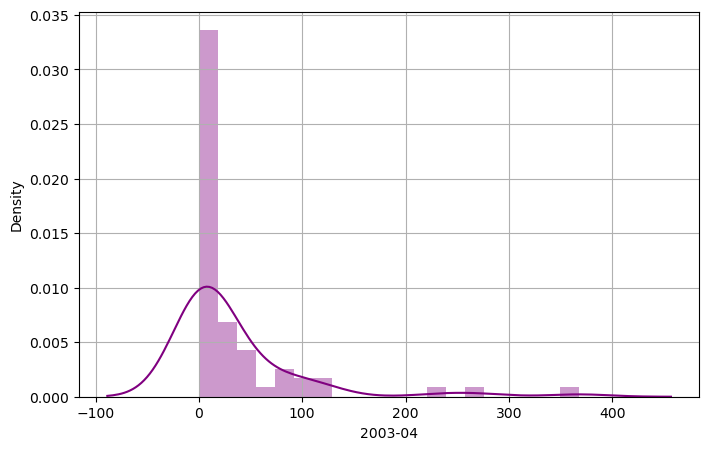

In [36]:
plt.figure(figsize=(8,5))
sns.distplot(fdi['2003-04'] , color = 'Purple')
plt.grid()
plt.show()

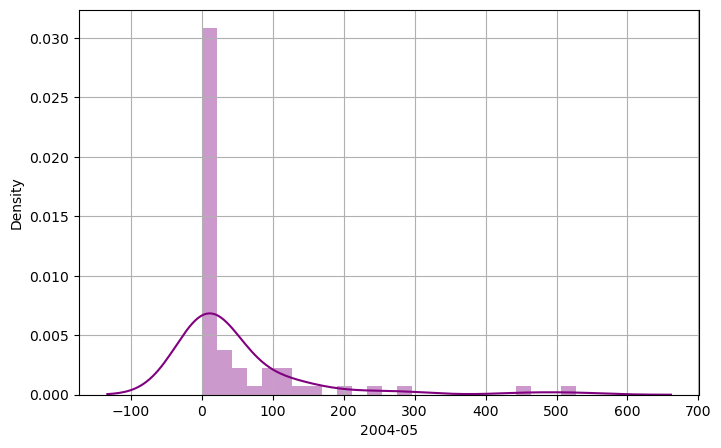

In [38]:
plt.figure(figsize=(8,5))
sns.distplot(fdi['2004-05'] , color = 'Purple')
plt.grid()
plt.show()

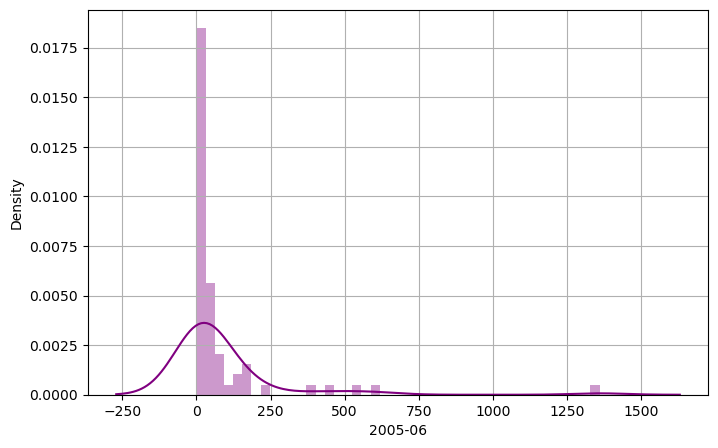

In [40]:
plt.figure(figsize=(8,5))
sns.distplot(fdi['2005-06'] , color = 'Purple')
plt.grid()
plt.show()

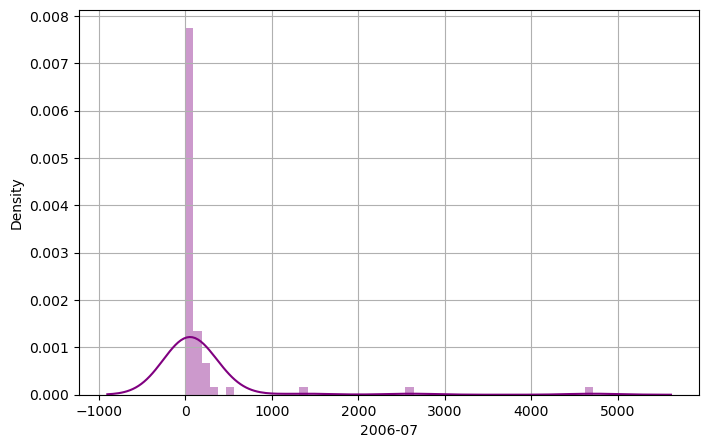

In [42]:
plt.figure(figsize=(8,5))
sns.distplot(fdi['2006-07'] , color = 'Purple')
plt.grid()
plt.show()

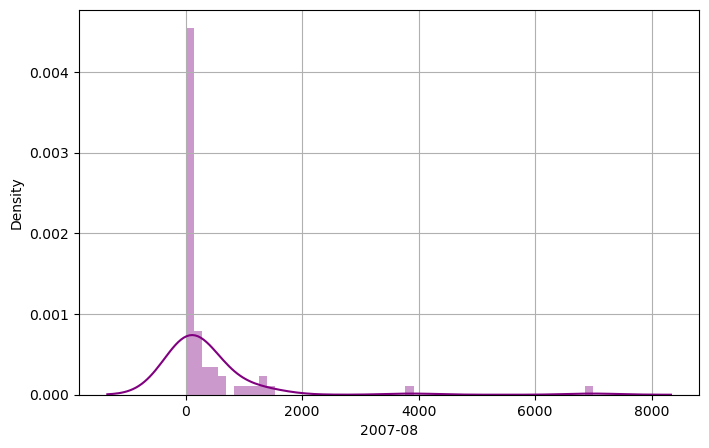

In [44]:
plt.figure(figsize=(8,5))
sns.distplot(fdi['2007-08'] , color = 'Purple')
plt.grid()
plt.show()

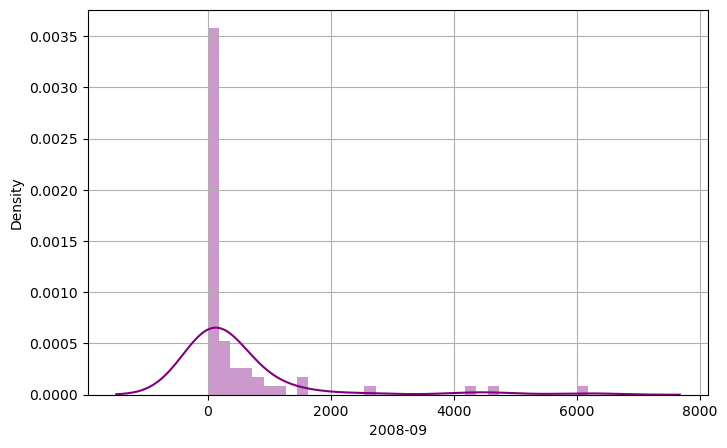

In [46]:
plt.figure(figsize=(8,5))
sns.distplot(fdi['2008-09'] , color = 'Purple')
plt.grid()
plt.show()

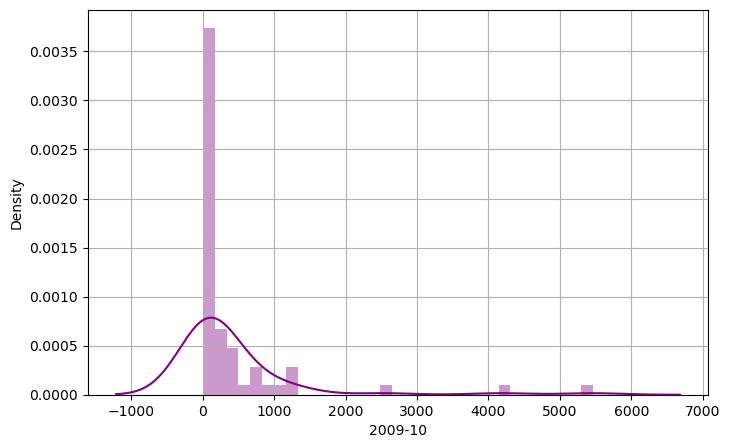

In [48]:
plt.figure(figsize=(8,5))
sns.distplot(fdi['2009-10'] , color = 'Purple')
plt.grid()
plt.show()

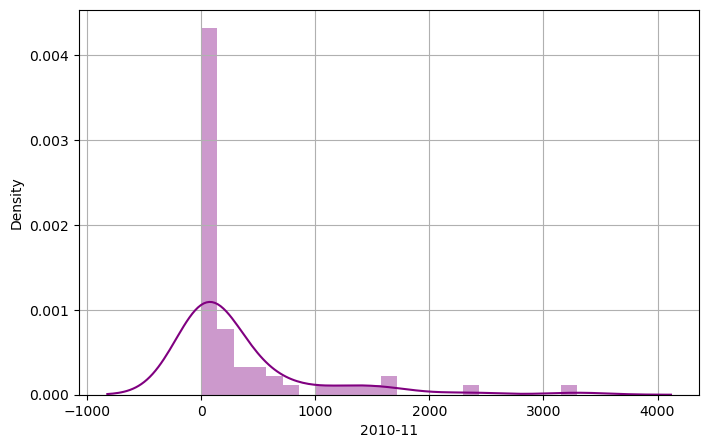

In [50]:
plt.figure(figsize=(8,5))
sns.distplot(fdi['2010-11'] , color = 'Purple')
plt.grid()
plt.show()

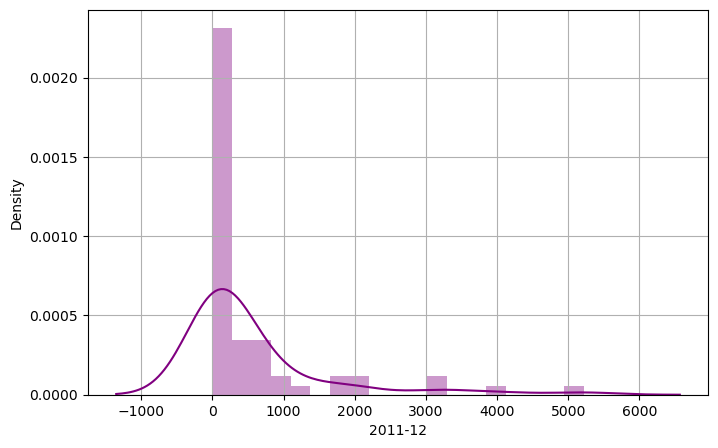

In [52]:
plt.figure(figsize=(8,5))
sns.distplot(fdi['2011-12'] , color = 'Purple')
plt.grid()
plt.show()

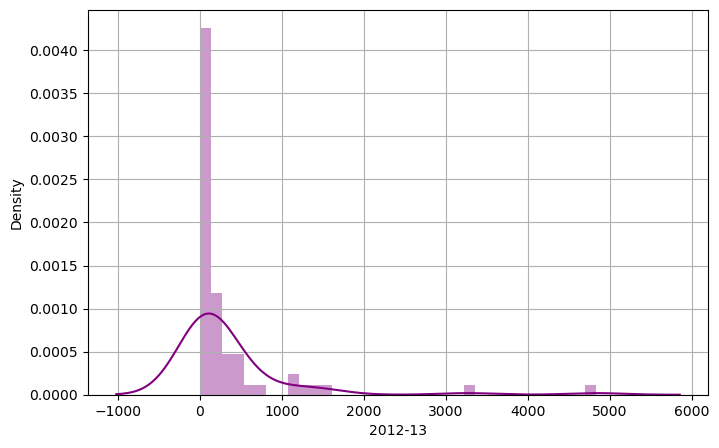

In [54]:
plt.figure(figsize=(8,5))
sns.distplot(fdi['2012-13'] , color = 'Purple')
plt.grid()
plt.show()

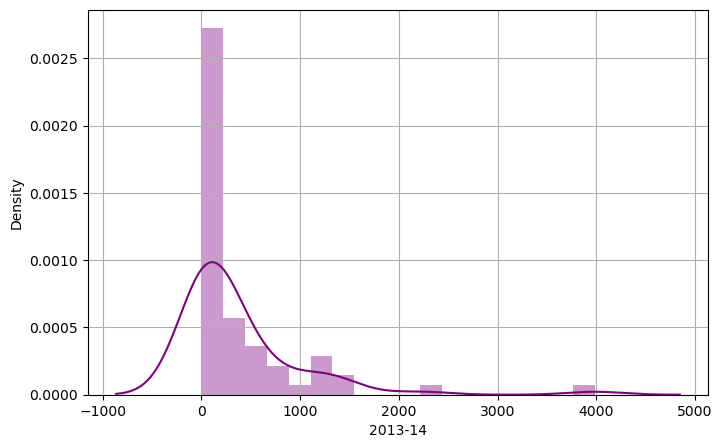

In [56]:
plt.figure(figsize=(8,5))
sns.distplot(fdi['2013-14'] , color = 'Purple')
plt.grid()
plt.show()

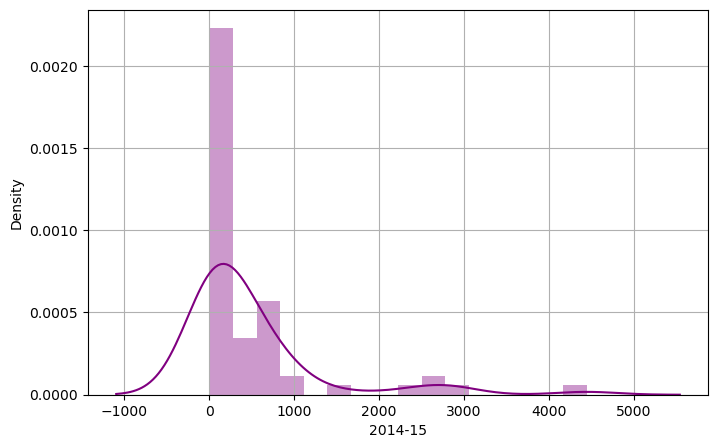

In [58]:
plt.figure(figsize=(8,5))
sns.distplot(fdi['2014-15'] , color = 'Purple')
plt.grid()
plt.show()

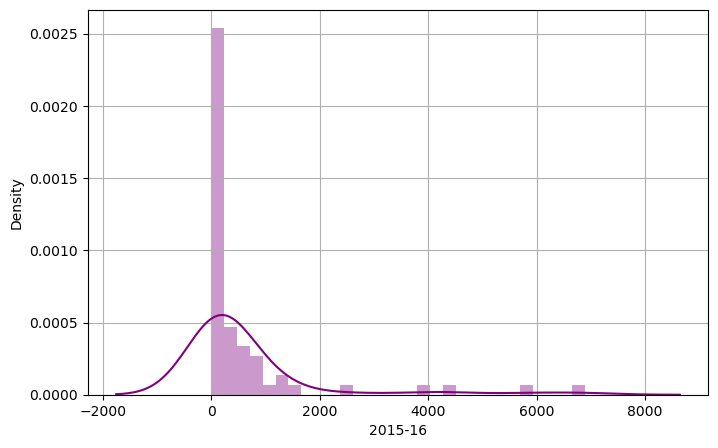

In [60]:
plt.figure(figsize=(8,5))
sns.distplot(fdi['2015-16'] , color = 'Purple')
plt.grid()
plt.show()

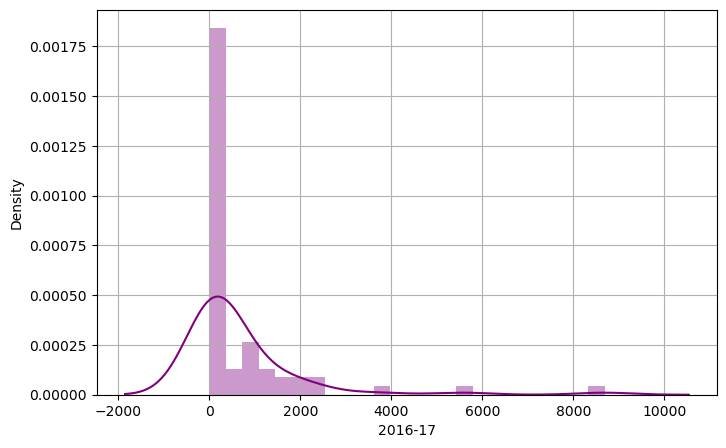

In [62]:
plt.figure(figsize=(8,5))
sns.distplot(fdi['2016-17'] , color = 'Purple')
plt.grid()
plt.show()

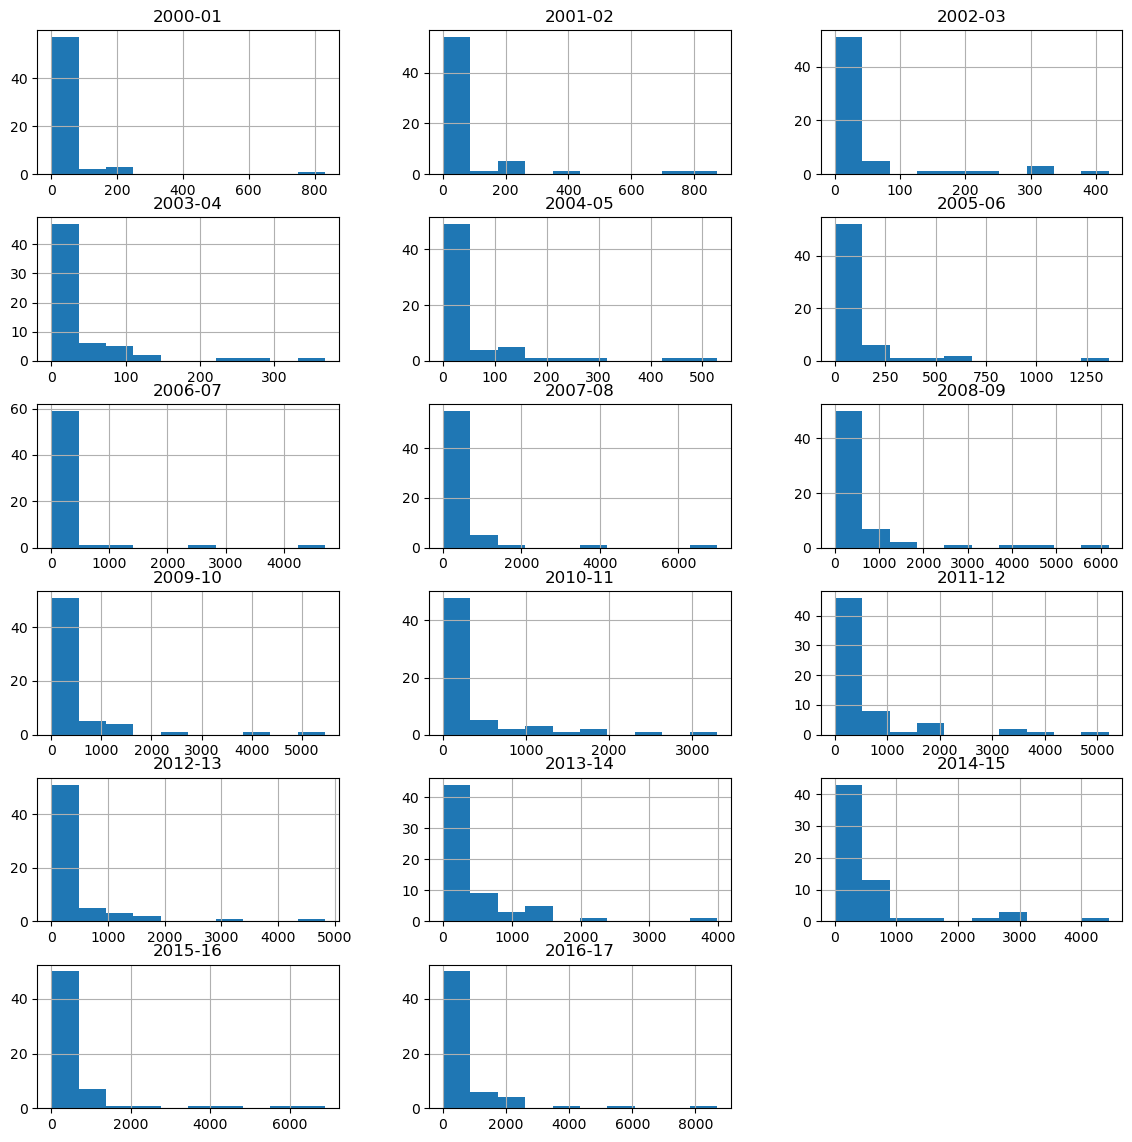

In [64]:
fdi.hist(figsize=(14,14),layout=(6,3));  #histogram for each numerical column in the DataFrame

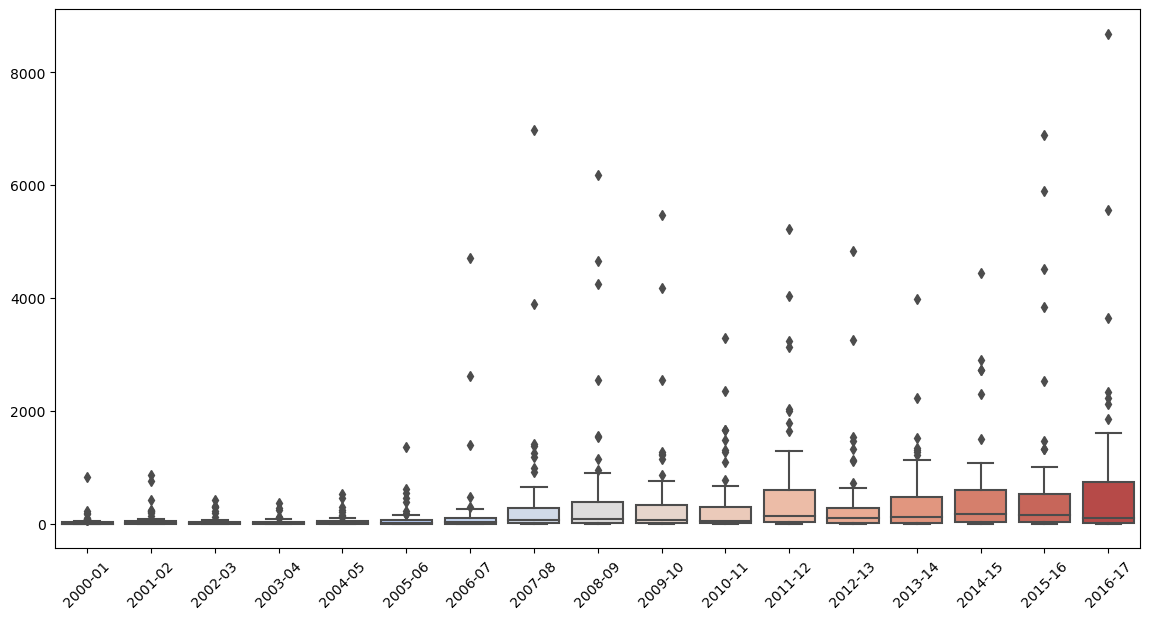

In [66]:
plt.figure(figsize=(14,7))
sns.boxplot(data = fdi , palette = 'coolwarm')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Pairplot of all variables
sns.pairplot(fdi, diag_kind = 'kde')
plt.show()

In [ ]:
corrMatrix = fdi.corr()
corrMatrix

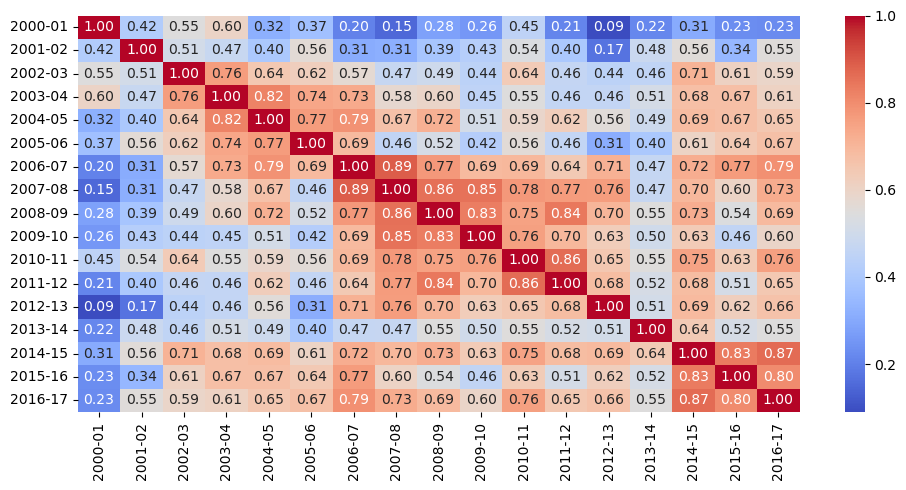

In [80]:
plt.figure(figsize=(10, 5))  # Adjust as needed
sns.heatmap(fdi.corr(), annot=True, fmt='.2f', cmap="coolwarm");
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [82]:
fdi.columns

Index(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '2016-17'],
      dtype='object')

In [90]:
if 'Sector' in fdi.columns:
    fdi.set_index('Sector', inplace=True)
else:
    # Handle the case where 'Sector' is not present
    print("Sector column not found. Skipping setting index.")


Sector column not found. Skipping setting index.


<Axes: >

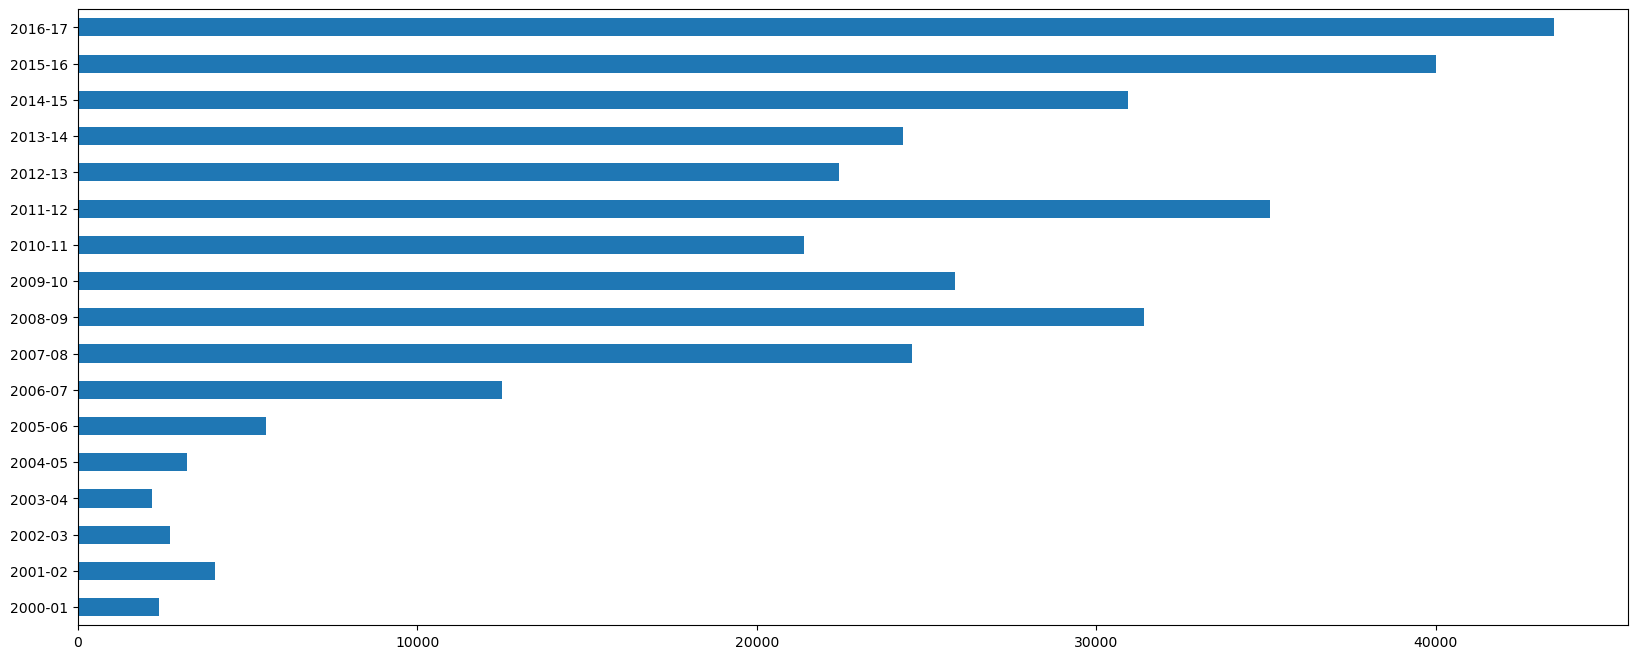

In [86]:
#year Investment
fdi.sum(axis=0).plot(kind='barh', figsize=(20,8)) #This plots the calculated sums as a horizontal bar chart.

<Axes: ylabel='Sector'>

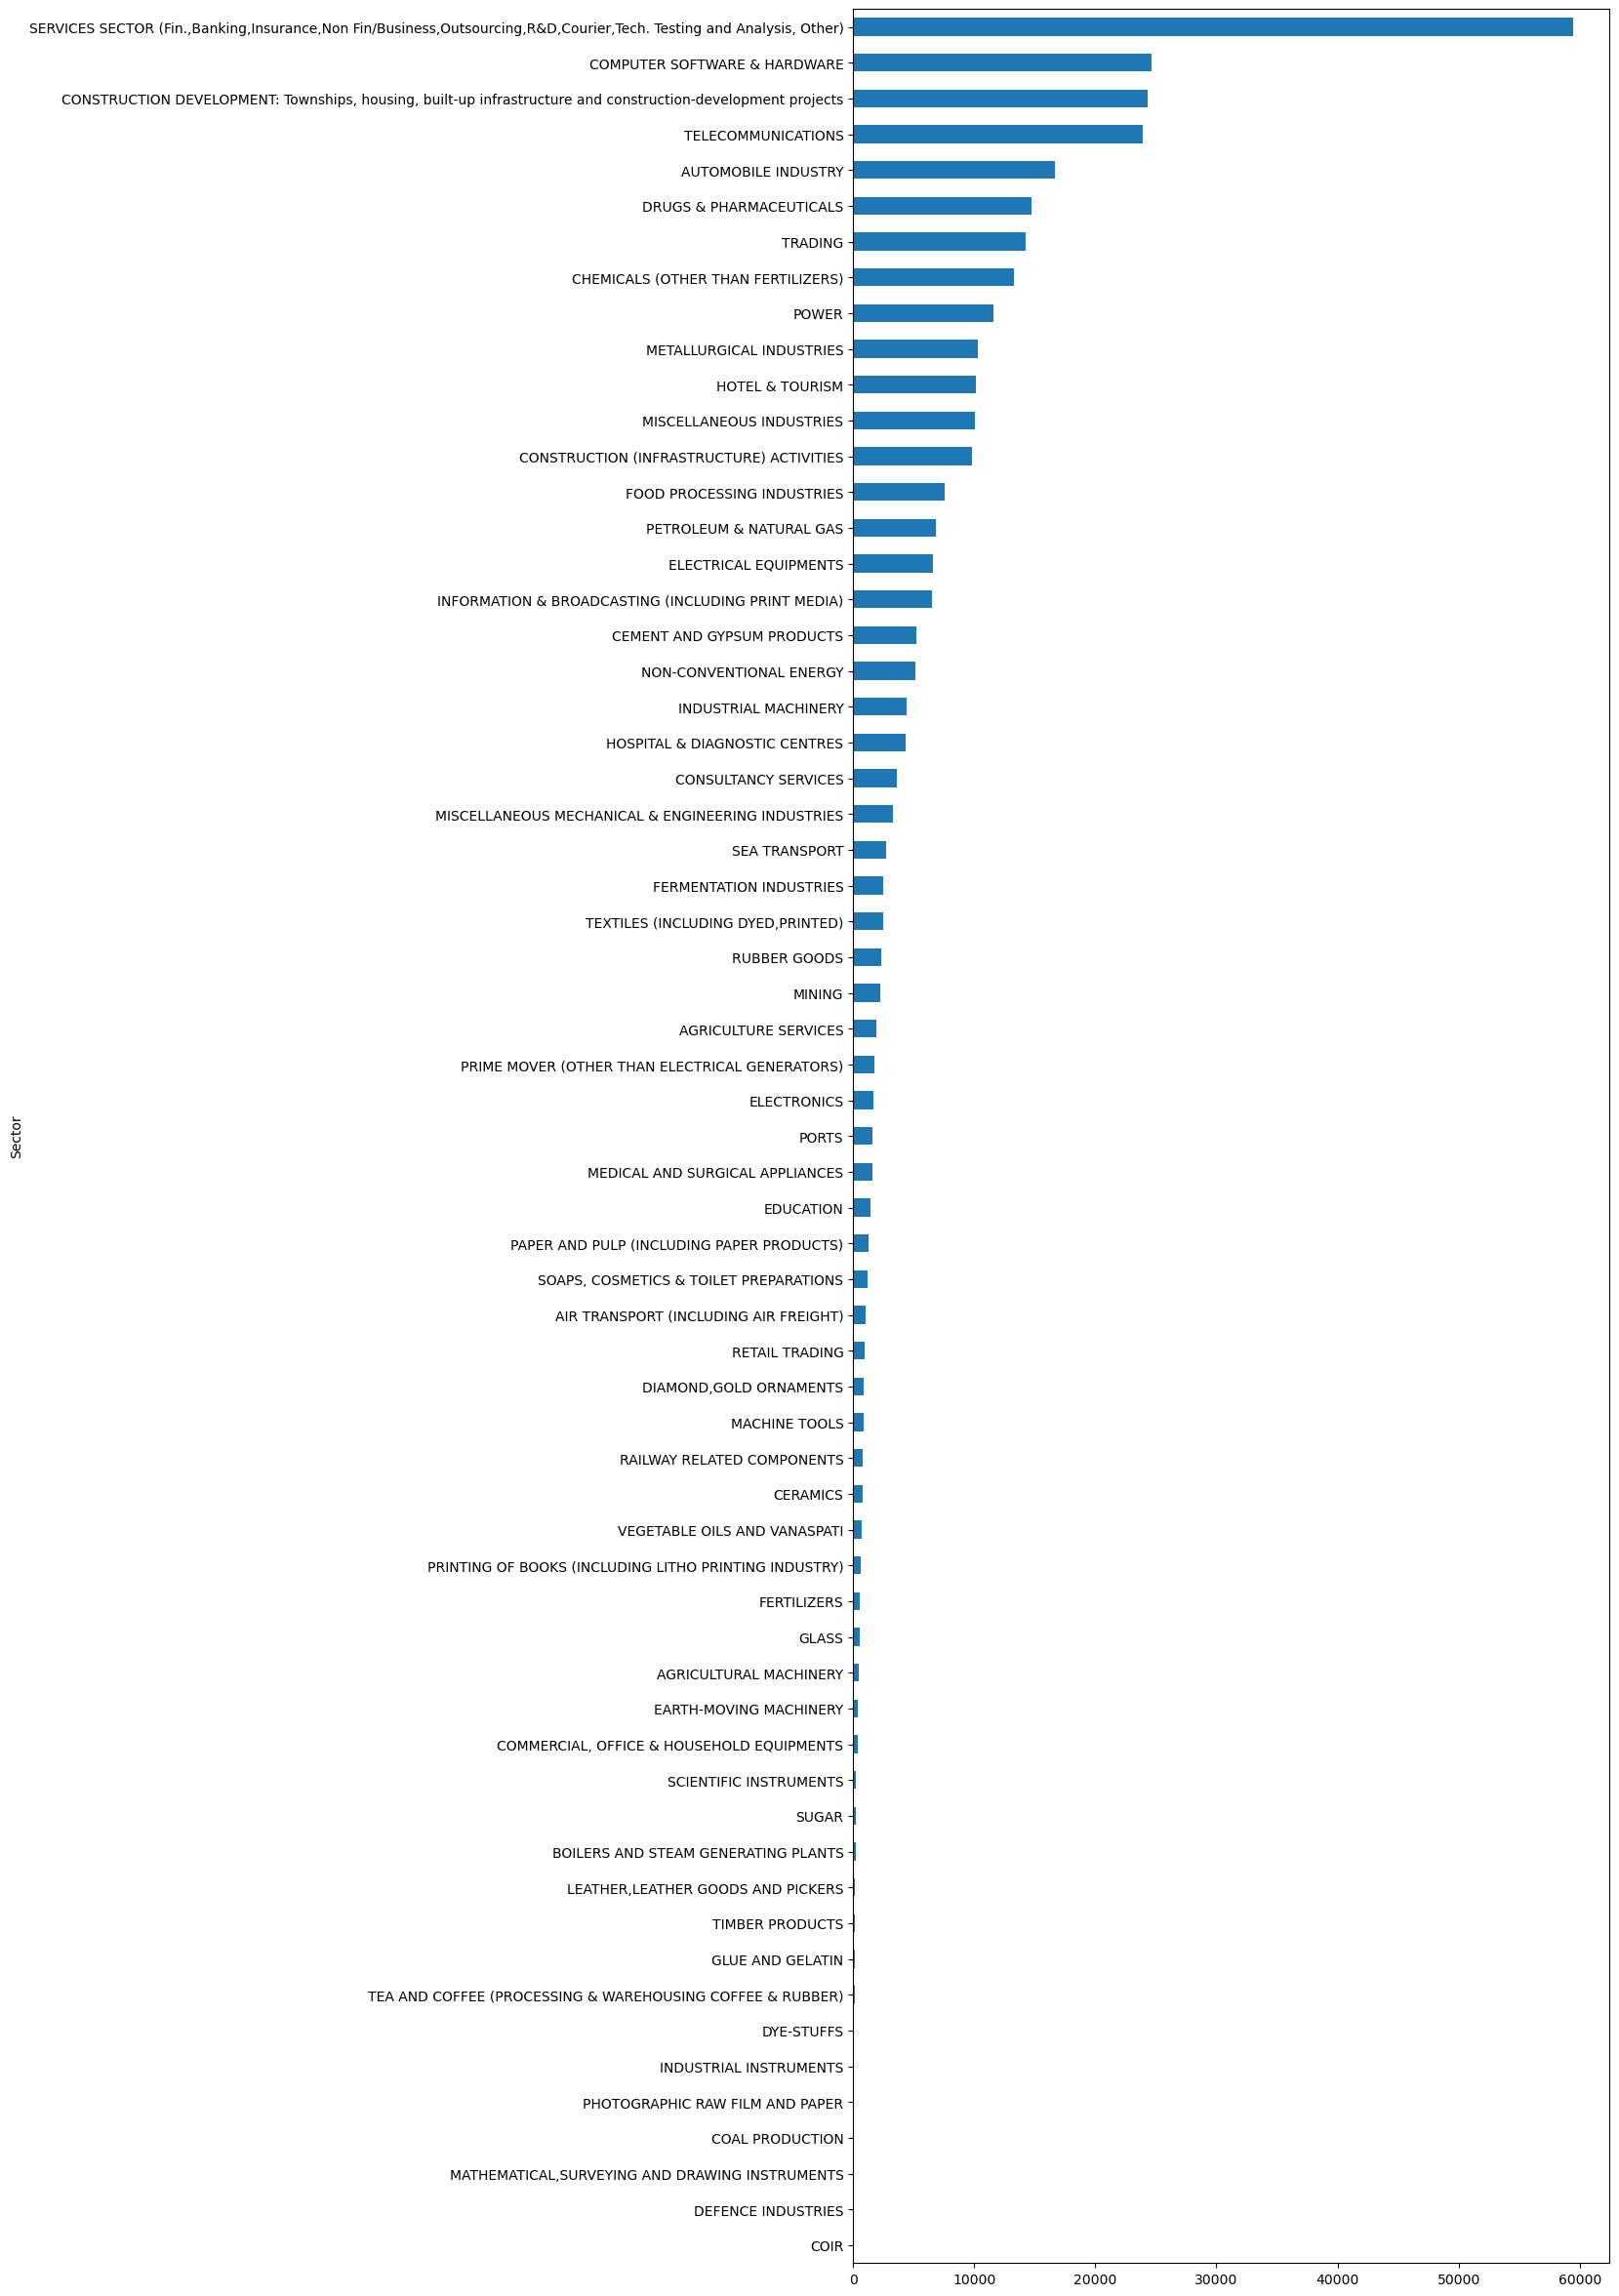

In [78]:
#sector Investment
fdi.sum(axis=1).sort_values().plot(kind = 'barh', figsize=(10,30))

<Axes: xlabel='Sector'>

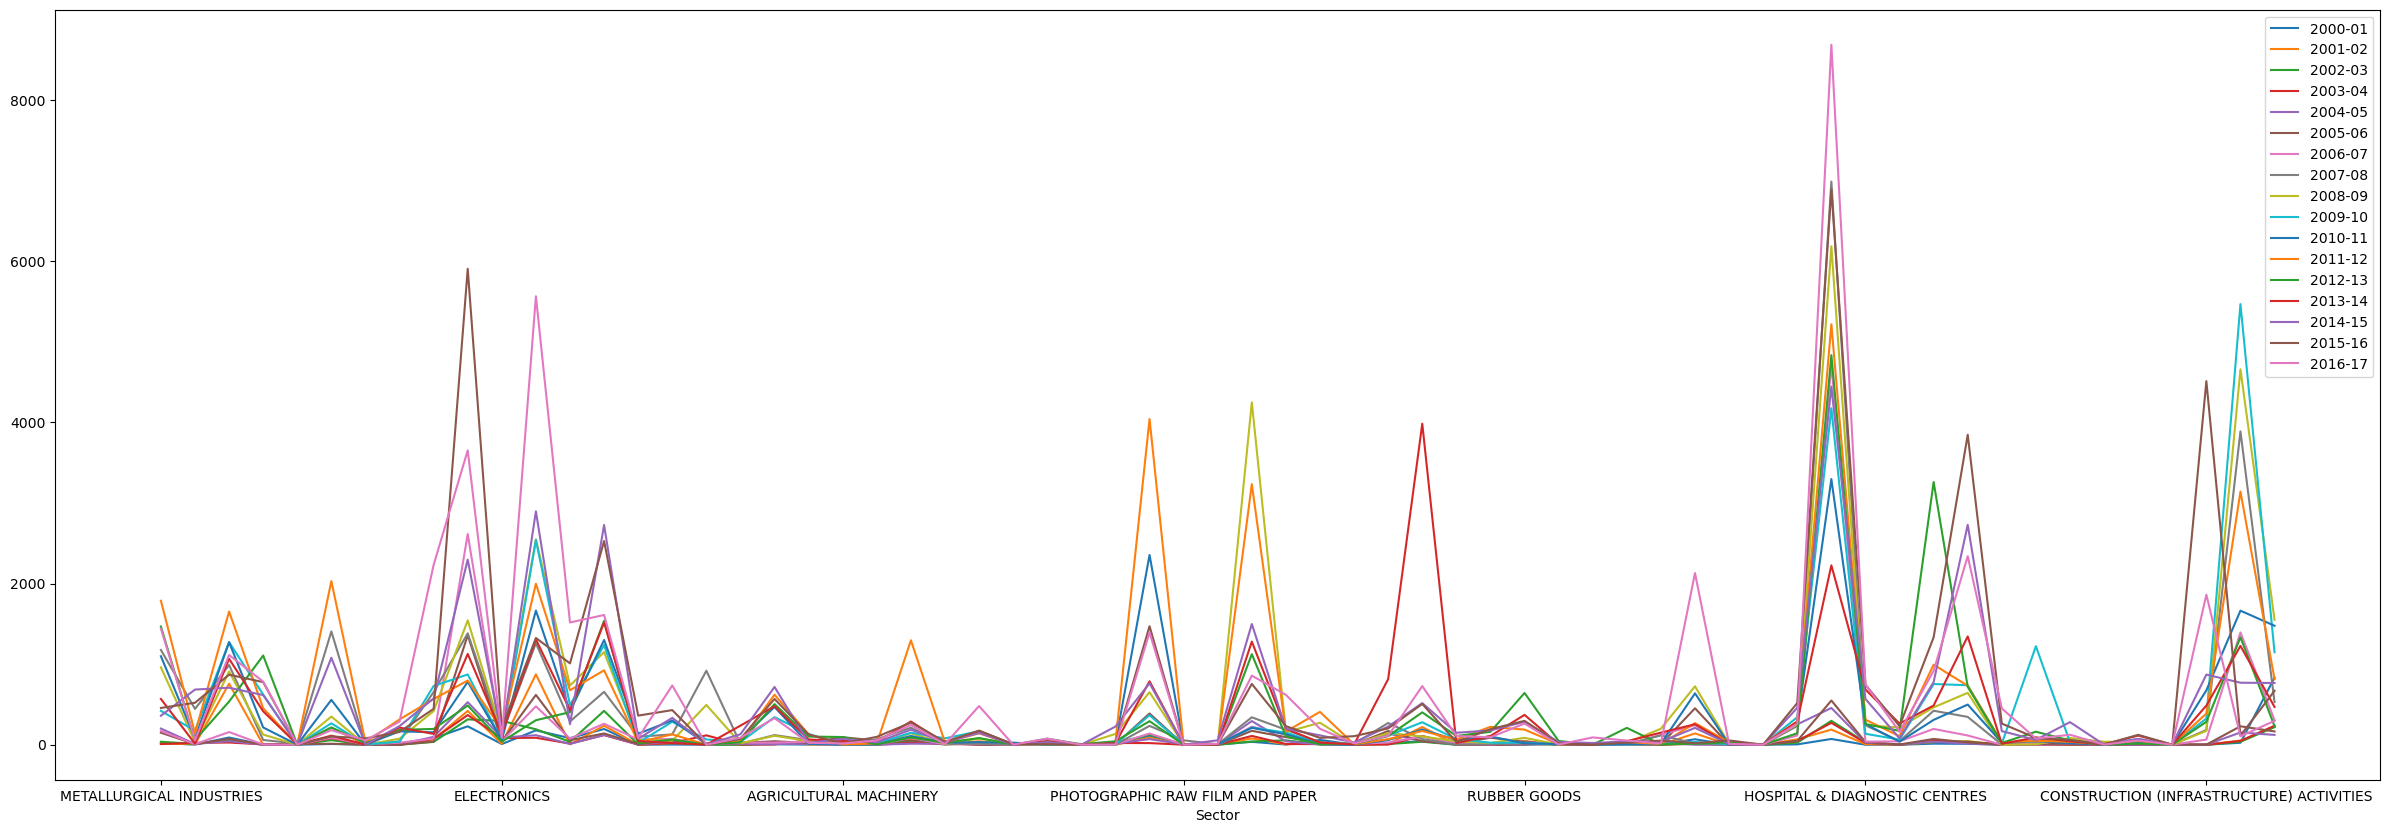

In [92]:
fdi.plot(figsize=(30,10))

In [94]:
import numpy as np

new = fdi.transpose()
corrMatrix=new.corr()

corrMatrix.loc[:,:] =  np.tril(corrMatrix, k=-1) 

already_in = set()
result = []
for col in corrMatrix:
    perfect_corr = corrMatrix[col][corrMatrix[col] >= 0.9].index.tolist()
    if perfect_corr and col not in already_in:
        already_in.update(set(perfect_corr))
        perfect_corr.append(col)
        result.append(perfect_corr)

result

[['TELECOMMUNICATIONS',
  'TEXTILES (INCLUDING DYED,PRINTED)',
  'GLUE AND GELATIN',
  'ELECTRICAL EQUIPMENTS'],
 ['TRADING', 'AUTOMOBILE INDUSTRY'],
 ['SUGAR',
  'CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES',
  'AIR TRANSPORT (INCLUDING AIR FREIGHT)'],
 ['RETAIL TRADING', 'SEA TRANSPORT'],
 ['SOAPS, COSMETICS & TOILET PREPARATIONS', 'INDUSTRIAL MACHINERY'],
 ['DEFENCE INDUSTRIES', 'MISCELLANEOUS MECHANICAL & ENGINEERING INDUSTRIES'],
 ['TEXTILES (INCLUDING DYED,PRINTED)', 'MEDICAL AND SURGICAL APPLIANCES'],
 ['GLASS', 'MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS'],
 ['DIAMOND,GOLD ORNAMENTS', 'DYE-STUFFS'],
 ['FOOD PROCESSING INDUSTRIES', 'FERMENTATION INDUSTRIES']]

In [96]:
RKM = list(fdi.columns)
RKM

['2000-01',
 '2001-02',
 '2002-03',
 '2003-04',
 '2004-05',
 '2005-06',
 '2006-07',
 '2007-08',
 '2008-09',
 '2009-10',
 '2010-11',
 '2011-12',
 '2012-13',
 '2013-14',
 '2014-15',
 '2015-16',
 '2016-17']

In [98]:
fdi_1 = fdi.loc[['TELECOMMUNICATIONS',
  'TEXTILES (INCLUDING DYED,PRINTED)',
  'GLUE AND GELATIN',
  'ELECTRICAL EQUIPMENTS'], RKM]

<Axes: >

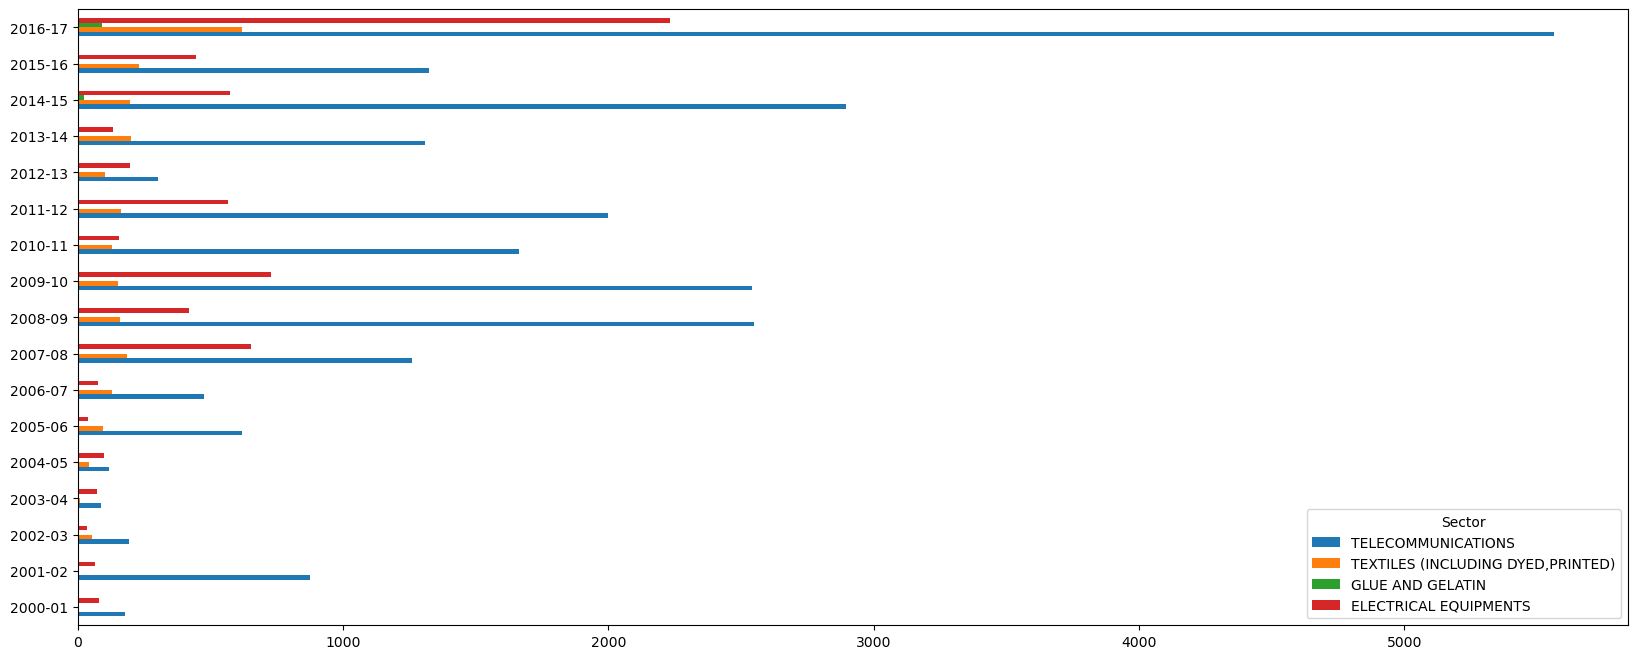

In [100]:
fdi_1.transpose().plot(kind = 'barh', figsize=(20,8))

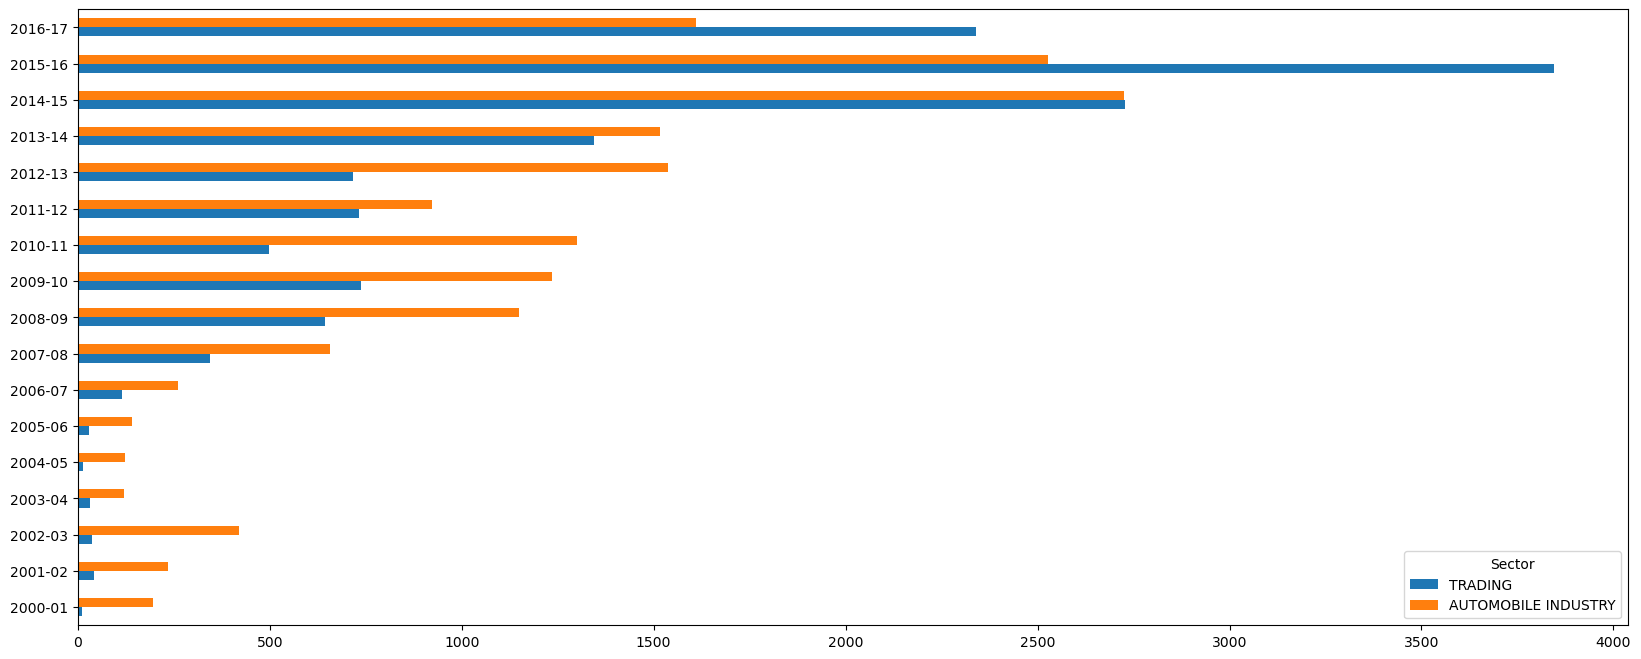

In [102]:
fdi_1 = fdi.loc[['TRADING', 'AUTOMOBILE INDUSTRY'], RKM]
fdi_1.transpose().plot(kind = 'barh', figsize=(20,8))
plt.show()

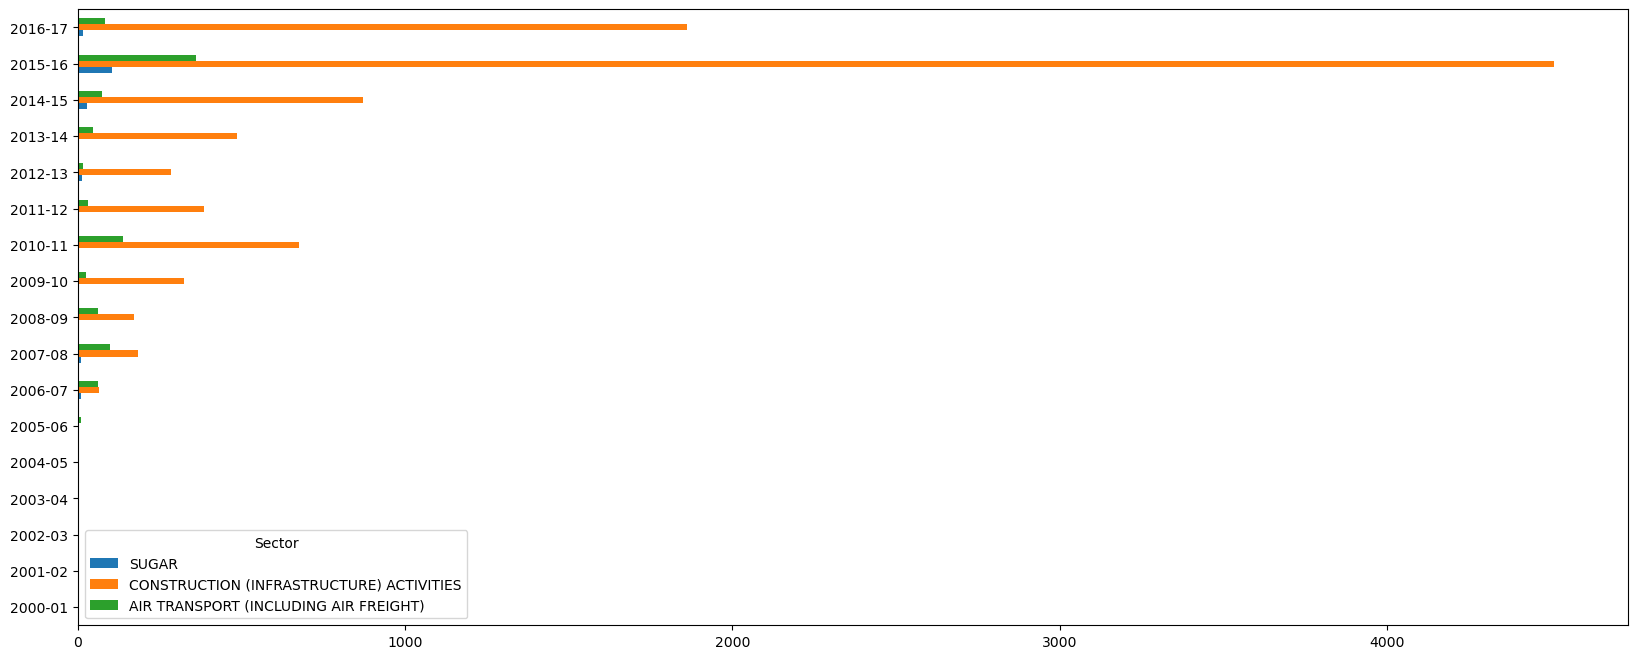

In [104]:
fdi_1 = fdi.loc[['SUGAR',
  'CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES',
  'AIR TRANSPORT (INCLUDING AIR FREIGHT)'], RKM]
fdi_1.transpose().plot(kind = 'barh', figsize=(20,8))
plt.show()

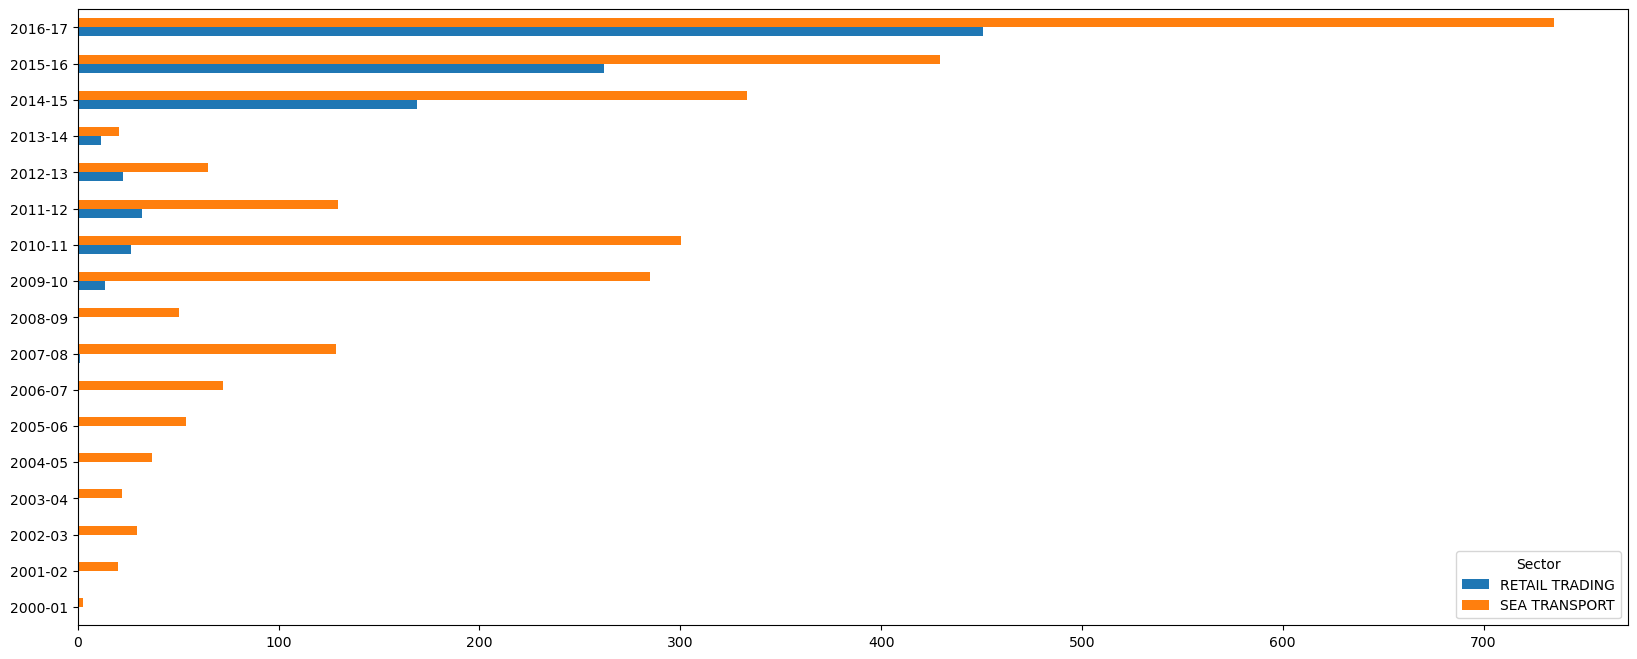

In [106]:
fdi_1 = fdi.loc[['RETAIL TRADING', 'SEA TRANSPORT'], RKM]
fdi_1.transpose().plot(kind = 'barh', figsize=(20,8))
plt.show()

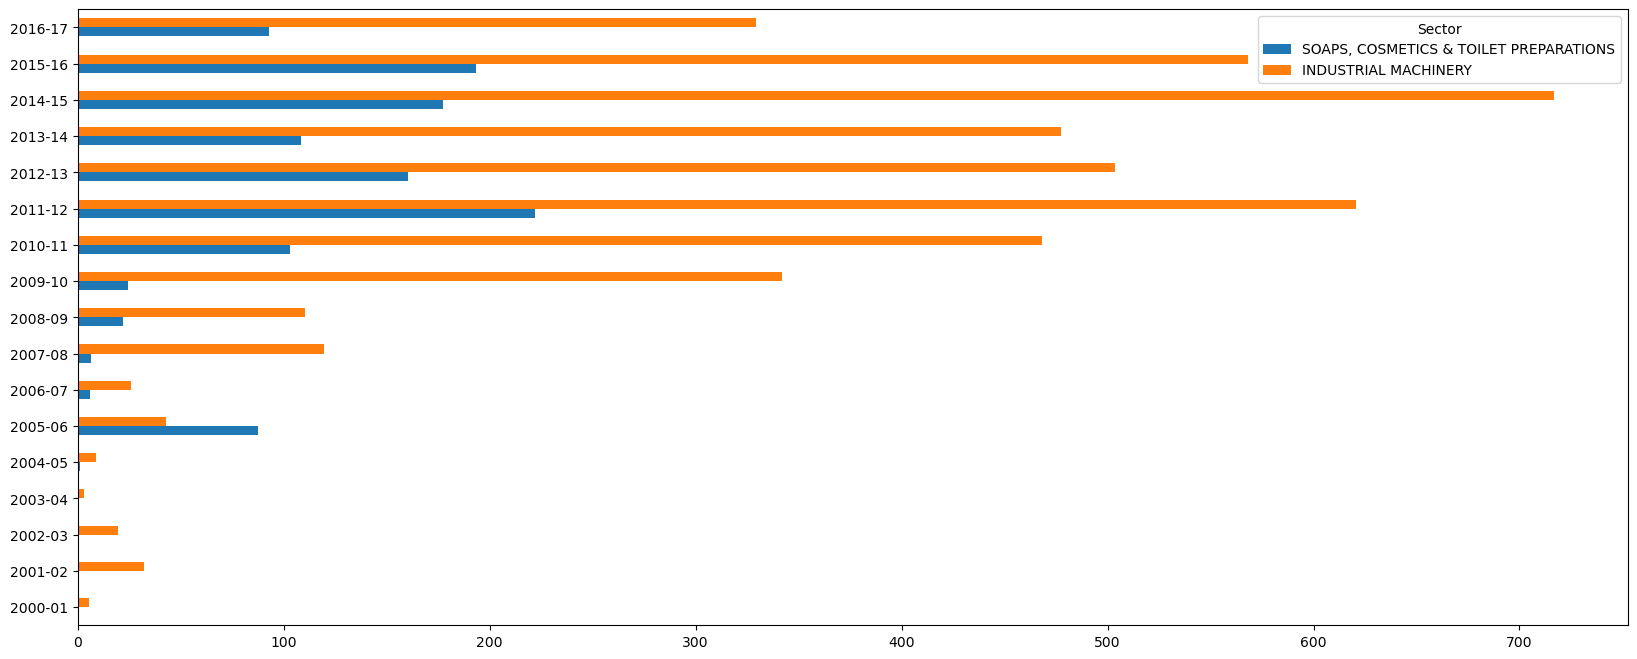

In [108]:
fdi_1 = fdi.loc[['SOAPS, COSMETICS & TOILET PREPARATIONS', 'INDUSTRIAL MACHINERY'], RKM]
fdi_1.transpose().plot(kind = 'barh', figsize=(20,8))
plt.show()

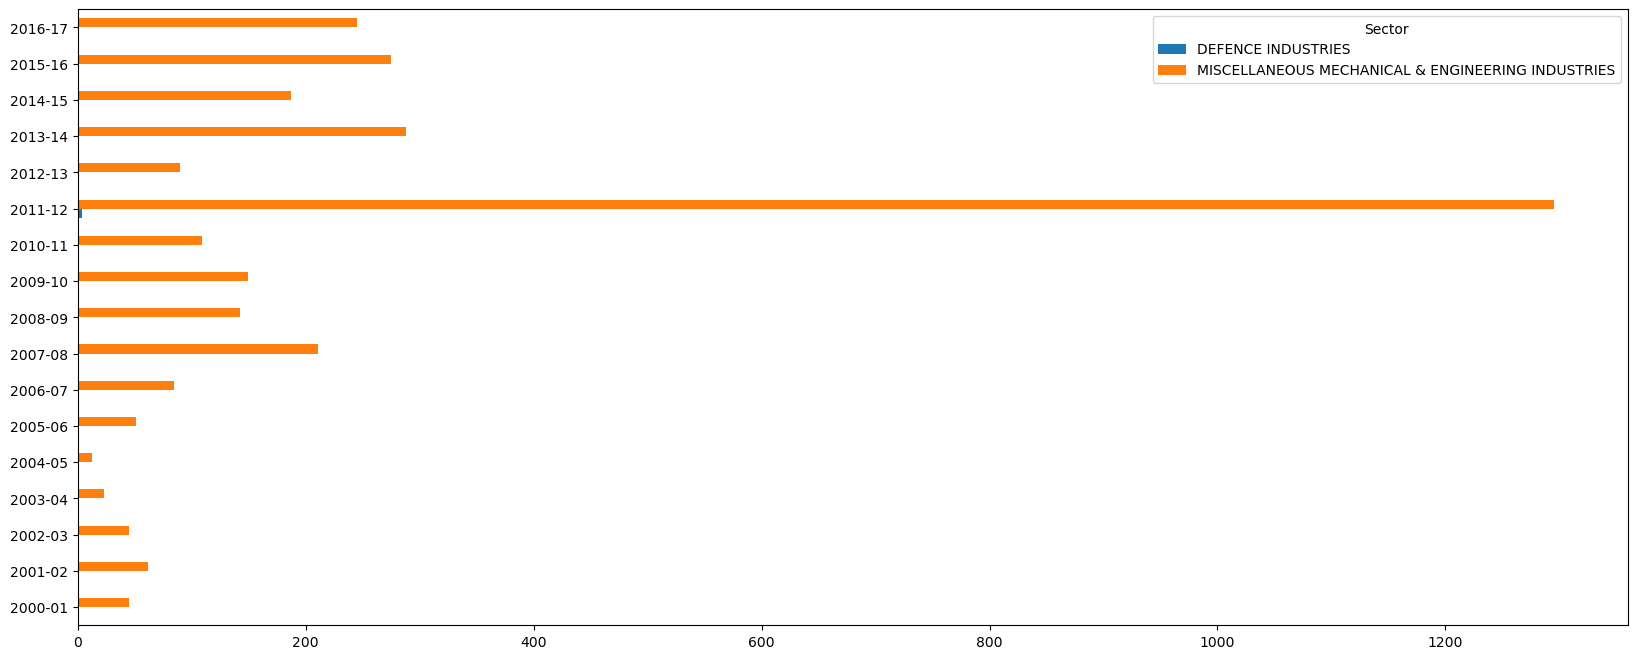

In [110]:
fdi_1 = fdi.loc[['DEFENCE INDUSTRIES', 'MISCELLANEOUS MECHANICAL & ENGINEERING INDUSTRIES'], RKM]
fdi_1.transpose().plot(kind = 'barh', figsize=(20,8))
plt.show()

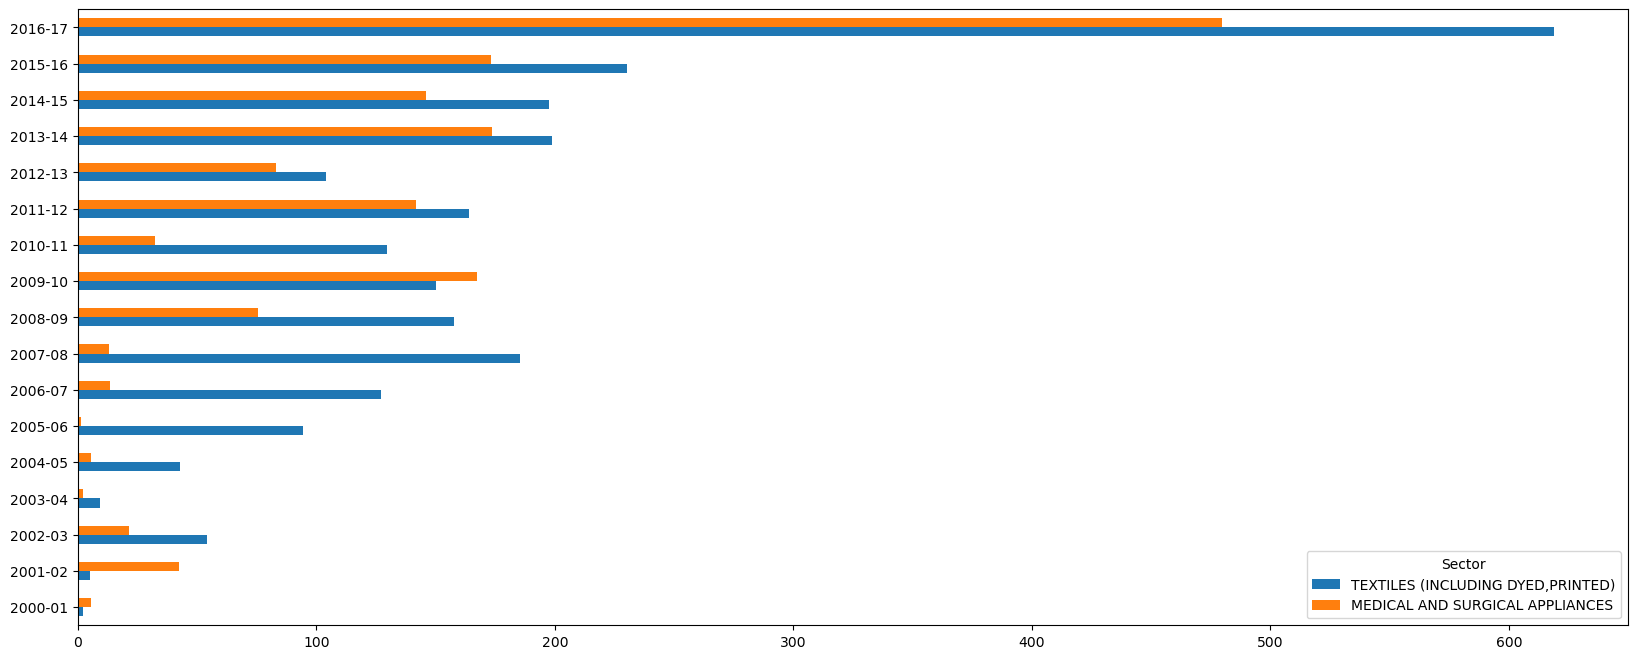

In [112]:
fdi_1 = fdi.loc[['TEXTILES (INCLUDING DYED,PRINTED)', 'MEDICAL AND SURGICAL APPLIANCES'], RKM]
fdi_1.transpose().plot(kind = 'barh', figsize=(20,8))
plt.show()

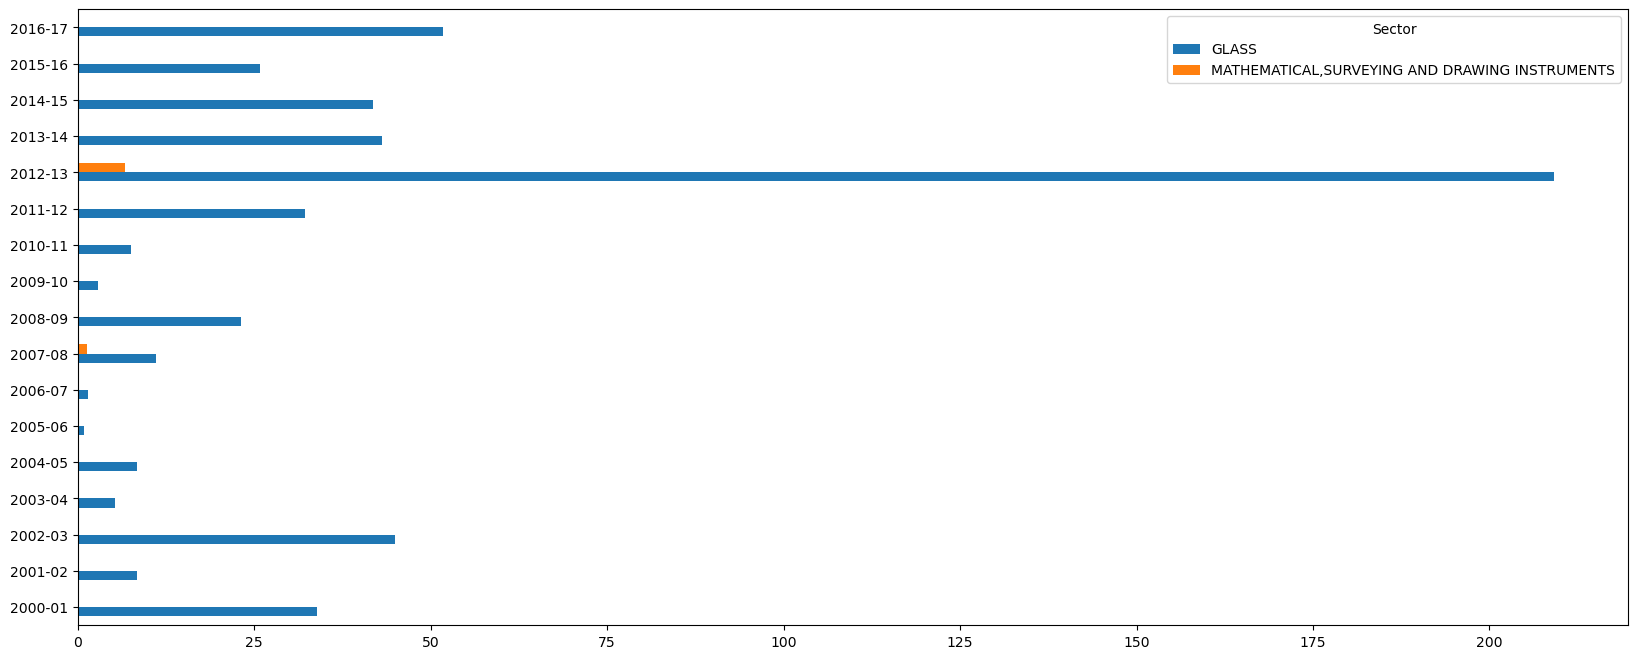

In [114]:
fdi_1 = fdi.loc[['GLASS', 'MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS'], RKM]
fdi_1.transpose().plot(kind = 'barh', figsize=(20,8))
plt.show()

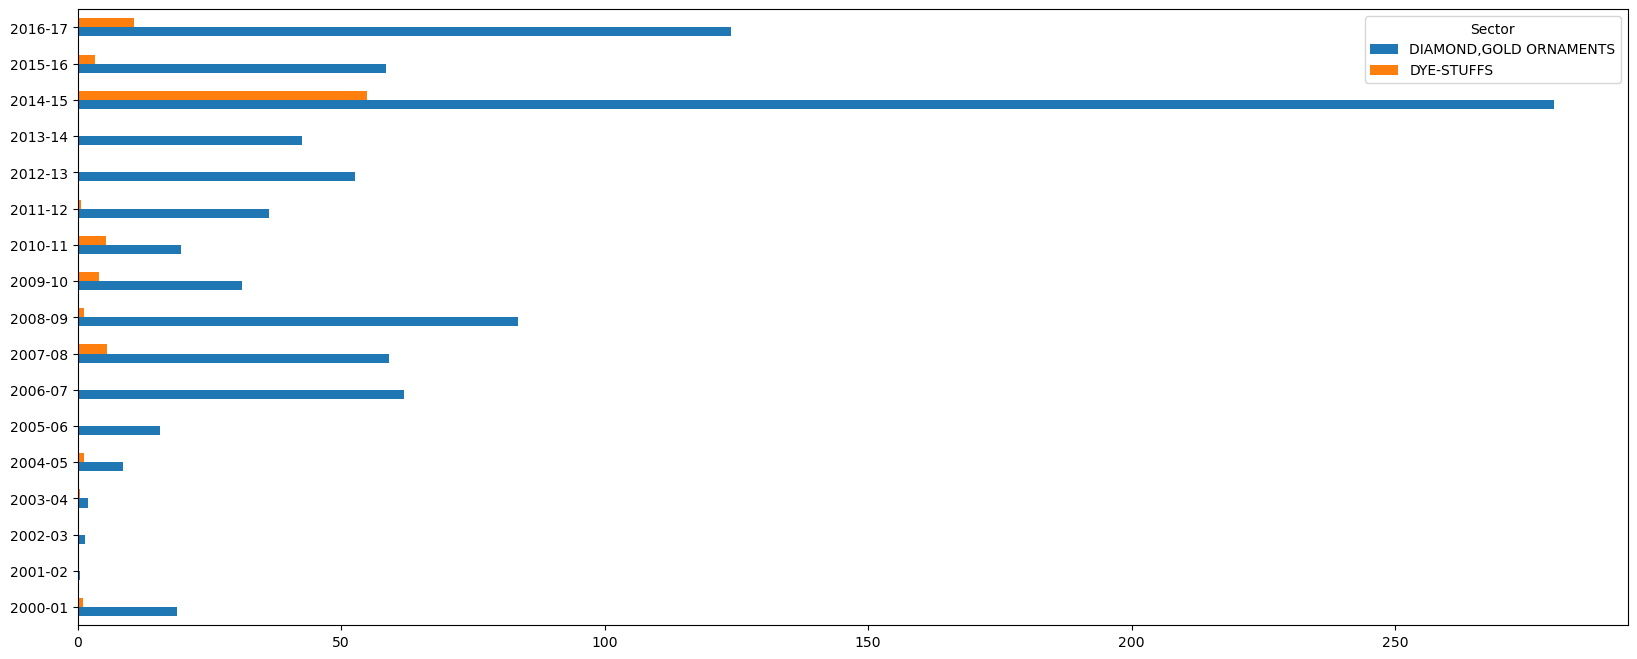

In [116]:
fdi_1 = fdi.loc[['DIAMOND,GOLD ORNAMENTS', 'DYE-STUFFS'], RKM]
fdi_1.transpose().plot(kind = 'barh', figsize=(20,8))
plt.show()

*******The FDI varies considerably across sectors, with a standard deviation of 14447.68. The median FDI is 15690.41 crore, while the average is slightly higher at 21318.95 crore. The minimum FDI is in the "METALLURGICAL INDUSTRIES" sector (10330.54 crore), and the maximum is in the "SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)" sector (59476.49 crore).********

In [120]:
#best 10
fdi.sum(axis=1).nlargest(10)

Sector
SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)    59476.49
COMPUTER SOFTWARE & HARDWARE                                                                                           24669.49
CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects            24293.09
TELECOMMUNICATIONS                                                                                                     23946.01
AUTOMOBILE INDUSTRY                                                                                                    16673.92
DRUGS & PHARMACEUTICALS                                                                                                14706.90
TRADING                                                                                                                14210.88
CHEMICALS (OTHER THAN FERTILIZERS)                                                               

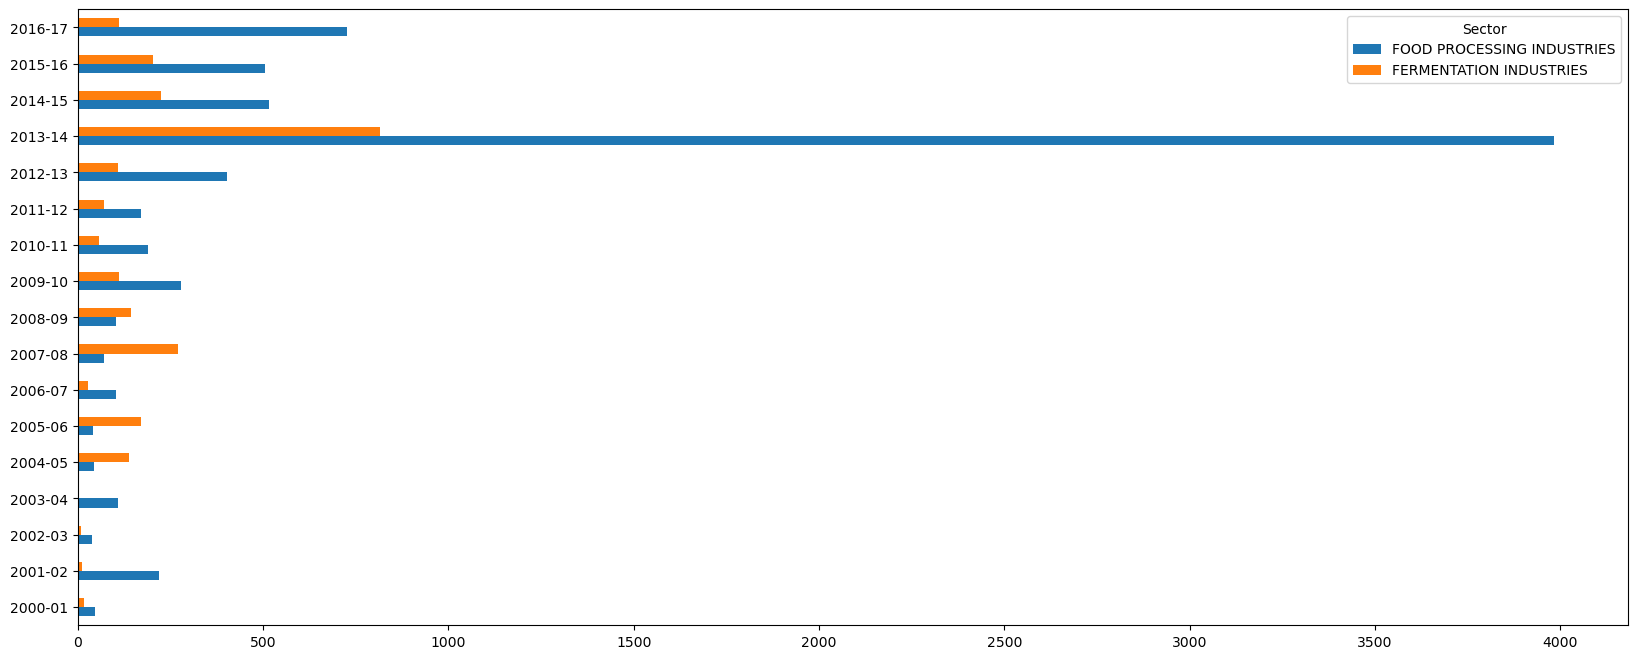

In [118]:
fdi_1 = fdi.loc[['FOOD PROCESSING INDUSTRIES', 'FERMENTATION INDUSTRIES'], RKM]
fdi_1.transpose().plot(kind = 'barh', figsize=(20,8))
plt.show()

In [122]:
#lowest 10
x = fdi.sum(axis=1).sort_values(ascending=True)
x.head(10)

Sector
COIR                                                           4.06
DEFENCE INDUSTRIES                                             5.12
MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS                 7.98
COAL PRODUCTION                                               27.74
PHOTOGRAPHIC RAW FILM AND PAPER                               67.28
INDUSTRIAL INSTRUMENTS                                        76.12
DYE-STUFFS                                                    88.40
TEA AND COFFEE (PROCESSING & WAREHOUSING COFFEE & RUBBER)    111.22
GLUE AND GELATIN                                             128.39
TIMBER PRODUCTS                                              157.68
dtype: float64

In [138]:
import pandas as pd

# Assuming your data is in the format you provided
data = {'Sector': ['COIR', 'DEFENCE INDUSTRIES', 'MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS', 'COAL PRODUCTION', 'PHOTOGRAPHIC RAW FILM AND PAPER', 'INDUSTRIAL INSTRUMENTS', 'DYE-STUFFS', 'TEA AND COFFEE (PROCESSING & WAREHOUSING COFFEE & RUBBER)', 'GLUE AND GELATIN', 'TIMBER PRODUCTS'],
        'Foreign Direct Investment (Rs. Crore)': [4.06, 5.12, 7.98, 27.74, 67.28, 76.12, 88.40, 111.22, 128.39, 157.68]}

# Create the DataFrame directly with 'Sector' as the index
df = pd.DataFrame(data).set_index('Sector')

print(df)


                                                    Foreign Direct Investment (Rs. Crore)
Sector                                                                                   
COIR                                                                                 4.06
DEFENCE INDUSTRIES                                                                   5.12
MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS                                       7.98
COAL PRODUCTION                                                                     27.74
PHOTOGRAPHIC RAW FILM AND PAPER                                                     67.28
INDUSTRIAL INSTRUMENTS                                                              76.12
DYE-STUFFS                                                                          88.40
TEA AND COFFEE (PROCESSING & WAREHOUSING COFFEE...                                 111.22
GLUE AND GELATIN                                                                   128.39
TIMBER PRO

#####result.The FDI varies considerably across sectors, with a standard deviation of 55.08. The median FDI is 71.70 crore, while the average is slightly higher at 67.40 crore. The minimum FDI is in the "COIR" sector (4.06 crore), and the maximum is in the "TIMBER PRODUCTS" sector (157.68 crore).